### [Students Exam Scores: Extended Dataset | Kaggle](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores)

In [1228]:
import matplotlib.pyplot as plt
import pandas as pd

In [1229]:
data = pd.read_csv('data/Expanded_data_with_more_features.csv')
data = data.dropna()
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


### Проаналізуйте розподіл за статтю серед учнів.

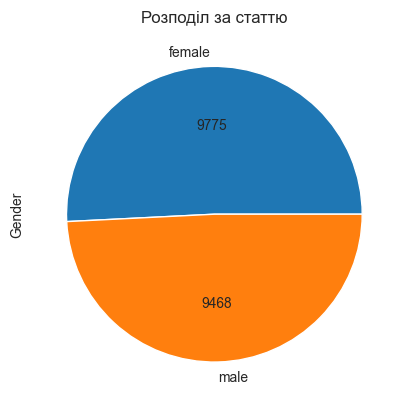

In [1230]:
marriage_count = data['Gender'].value_counts()

marriage_count.plot(kind="pie", autopct= lambda x: '{:.0f}'.format(x*marriage_count.sum()/100))
plt.title("Розподіл за статтю")
plt.show()


####  1. Скільки студентів і студенток у наборі даних?

In [1231]:
data['Gender'].value_counts()

female    9775
male      9468
Name: Gender, dtype: int64

#### 2. Який відсоток студентів чоловічої статі в наборі даних?

In [1232]:
(data['Gender'].value_counts()['male'] / data.shape[0]) * 100

49.202307332536506

#### 3. Який відсоток студенток у наборі даних?

In [1233]:
(data['Gender'].value_counts()['female'] / data.shape[0]) * 100

50.79769266746349

### Дослідіть зв’язок між етнічною групою та результатами тестів.

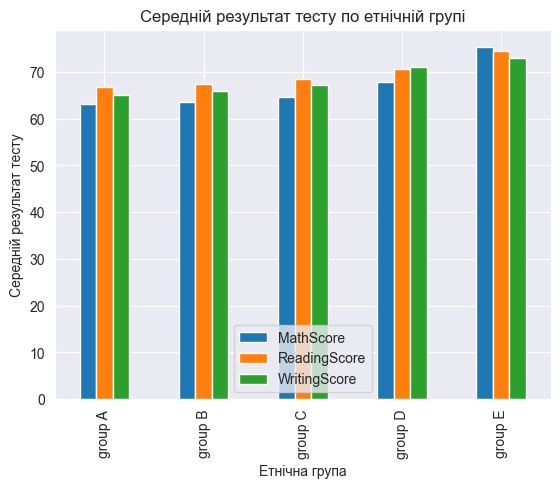

In [1234]:
ethnic_means = data[["EthnicGroup", "MathScore", "ReadingScore", "WritingScore"]].groupby("EthnicGroup").mean()

ethnic_means.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"])
plt.xlabel("Етнічна група")
plt.ylabel("Середній результат тесту")
plt.title("Середній результат тесту по етнічній групі")
plt.show()

#### 4. Яка етнічна група має найвищий середній бал з математики?

In [1235]:
data.groupby('EthnicGroup')['MathScore'].mean().idxmax()

'group E'

#### 5. Яка етнічна група має найвищий середній бал читання?

In [1236]:
data.groupby('EthnicGroup')['ReadingScore'].mean().idxmax()

'group E'

#### 6. Яка етнічна група має найвищий середній бал з письма?

In [1237]:
data.groupby('EthnicGroup')['WritingScore'].mean().idxmax()

'group E'

### Дослідіть вплив курсу підготовки до тесту на результати тесту.

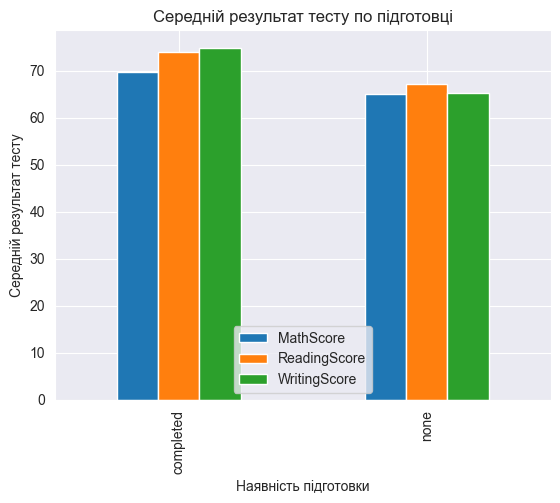

In [1238]:
tests_means = data[["TestPrep", "MathScore", "ReadingScore", "WritingScore"]].groupby("TestPrep").mean()

tests_means.plot(kind="bar", y=["MathScore", "ReadingScore", "WritingScore"])
plt.xlabel("Наявність підготовки")
plt.ylabel("Середній результат тесту")
plt.title("Середній результат тесту по підготовці")
plt.show()

#### 7. Який середній бал з математики для студентів, які закінчили курс підготовки до тесту?

In [1239]:
data[data['TestPrep'] == 'completed']['MathScore'].mean()

69.64963942307692

#### 8. Який середній бал з читання для студентів, які пройшли курс підготовки до тесту?

In [1240]:
data[data['TestPrep'] == 'completed']['ReadingScore'].mean()

73.85982572115384

#### 9. Який середній бал для студентів, які закінчили курс підготовки до тесту?

In [1241]:
data[data['TestPrep'] == 'completed']['WritingScore'].mean()

74.86298076923077

### Проаналізуйте розподіл батьків(ів) за сімейним станом серед учнів.

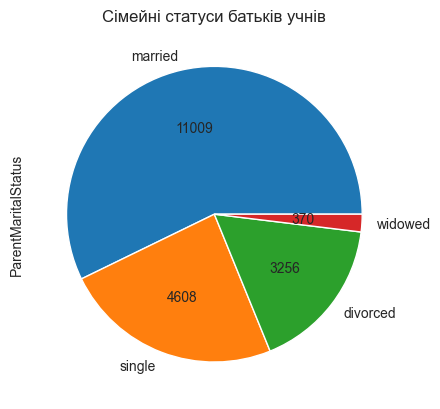

In [1242]:
marriage_count = data['ParentMaritalStatus'].value_counts()

marriage_count.plot(kind="pie", autopct= lambda x: '{:.0f}'.format(x*marriage_count.sum()/100))
plt.title("Сімейні статуси батьків учнів")
plt.show()

#### 10. Скільки студентів мають одружених батьків?

In [1243]:
data[data['ParentMaritalStatus'] == 'married'].shape[0]

11009

#### 11. Скільки студентів мають батьків-одинаків?

In [1244]:
data[data['ParentMaritalStatus'] == 'single'].shape[0]

4608

### Дослідіть зв’язок між заняттями спортом і результатами тестів.

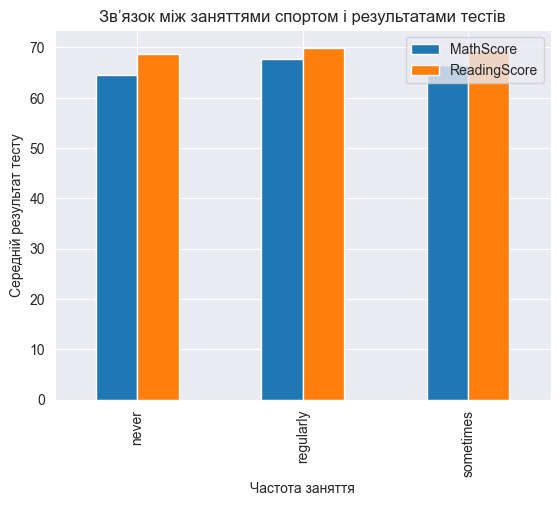

In [1245]:
sport_means = data[["PracticeSport", "MathScore", "ReadingScore"]].groupby("PracticeSport").mean()

sport_means.plot(kind="bar")
plt.xlabel("Частота заняття")
plt.ylabel("Середній результат тесту")
plt.title("Зв’язок між заняттями спортом і результатами тестів")
plt.show()

#### 12. Чи студенти, які регулярно займаються спортом, мають вищі середні результати з математики, ніж ті, хто ніколи не займається спортом?

In [1246]:
avg_math_sports = data.groupby('PracticeSport')['MathScore'].mean()
avg_math_sports['regularly'] > avg_math_sports['never']

True

#### 13. Чи студенти, які регулярно займаються спортом, мають вищі середні результати читання, ніж ті, хто ніколи не займається спортом?

In [1247]:
avg_reading_sports = data.groupby('PracticeSport')['ReadingScore'].mean()
avg_reading_sports['regularly'] > avg_reading_sports['never']

True

### Проаналізуйте розподіл транспортних засобів до школи серед учнів.

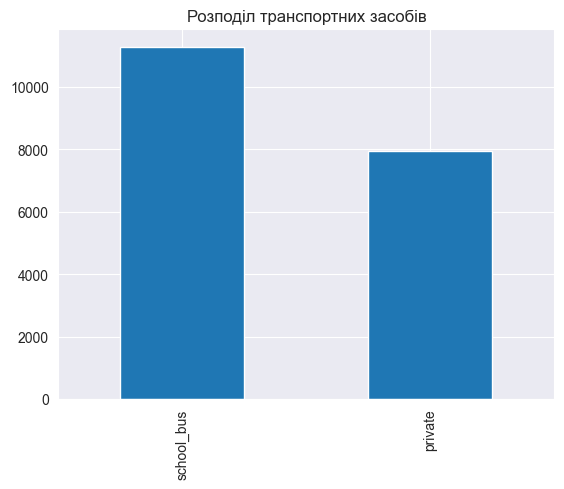

In [1248]:
transport_count = data['TransportMeans'].value_counts()

transport_count.plot(kind="bar")
plt.title("Розподіл транспортних засобів")
plt.show()

#### 14. Скільки учнів користується шкільним автобусом, щоб дістатися до школи?

In [1249]:
data[data['TransportMeans'] == 'school_bus'].shape[0]

11280

#### 15. Скільки учнів користується приватним транспортом, щоб дістатися до школи?

In [1250]:
data[data['TransportMeans'] == 'private'].shape[0]

7963

### Передбачте, чи завершив студент курс підготовки до іспиту, на основі його демографічних та академічних даних.
#### Вхідні дані:
- Gender
- EthnicGroup
- ParentEduc
- LunchType
- ParentMaritalStatus
- PracticeSport
- IsFirstChild
- NrSiblings
- TransportMeans
- WklyStudyHours
- MathScore
- ReadingScore
- WritingScore
#### Результат:
- TestPrep

In [1251]:
scores = pd.read_csv("./data/Expanded_data_with_more_features.csv")
scores = scores.dropna()
scores.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39


In [1252]:
data = scores[["Gender", "EthnicGroup", "ParentEduc", "LunchType", "ParentMaritalStatus", "PracticeSport", "IsFirstChild", "NrSiblings", "TransportMeans", "WklyStudyHours", "MathScore", "ReadingScore", "WritingScore"]]
target = scores["TestPrep"]
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,female,group B,master's degree,standard,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
4,male,group C,some college,standard,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,married,sometimes,yes,1.0,private,> 10,41,43,39


In [1253]:
target = target.map({'none': 0, 'completed': 1})

In [1254]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

pipe_cat = Pipeline([('OHE', OneHotEncoder(drop='first', handle_unknown='ignore'))])
pipe_num = Pipeline([('scale', StandardScaler())])

categorical_vars = data.select_dtypes('object').columns.tolist()
numerical_vars = data.select_dtypes('number').columns.tolist()

full_pipeline = Pipeline([
        ('preprocess', ColumnTransformer(transformers=[
        ('numbers', pipe_num, numerical_vars),
        ('categories', pipe_cat, categorical_vars)
    ]))
])

full_pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numbers',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['NrSiblings', 'MathScore',
                                                   'ReadingScore',
                                                   'WritingScore']),
                                                 ('categories',
                                                  Pipeline(steps=[('OHE',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender', 'EthnicGroup',
                                                   'ParentEduc', 'LunchType',
                                                   'ParentMaritalStatus',
                                                   'PracticeSport',
                                                   'IsFirstChild',
                                                   'TransportMeans',
                                                   'WklyStudyHours'])]))])

In [1255]:
data_prepared = full_pipeline.fit_transform(data)

In [1256]:
random_state = 42

In [1257]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_prepared, target, test_size=.2, random_state=random_state)

#### SGDClassifier

In [1258]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-5, random_state=random_state)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42, tol=1e-05)

In [1259]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [1260]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[8830, 1236],
       [2699, 2629]], dtype=int64)

In [1261]:
from sklearn.metrics import classification_report

t_test_pred = sgd_clf.predict(X_test)
print(classification_report(y_test, t_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      2521
           1       0.71      0.45      0.55      1328

    accuracy                           0.75      3849
   macro avg       0.73      0.68      0.69      3849
weighted avg       0.74      0.75      0.73      3849



In [1262]:
sgd_clf.score(X_test, y_test)

0.7474668745128605

#### RandomForestClassifier

In [1263]:
from sklearn.ensemble import RandomForestClassifier

rnd_f_cls = RandomForestClassifier(random_state=random_state)
rnd_f_cls.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1264]:
y_train_pred = cross_val_predict(rnd_f_cls, X_train, y_train, cv=3)

In [1265]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[9074,  992],
       [3495, 1833]], dtype=int64)

In [1266]:
print(classification_report(y_test, t_test_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82      2521
           1       0.71      0.45      0.55      1328

    accuracy                           0.75      3849
   macro avg       0.73      0.68      0.69      3849
weighted avg       0.74      0.75      0.73      3849



In [1267]:
rnd_f_cls.score(X_test, y_test)

0.7079760976877111